In [106]:
import pandas as pd
import re
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [83]:
data=pd.read_csv('/Users/stella/Desktop/13565_0.TXT',error_bad_lines=False)
start=data.iloc[2]
start=start[0][7:]
start=datetime.strptime(start, '%d.%m.%Y %H:%M:%S')
data=data[5:]
data=data['Partector SN -13565'].str.split('\t', expand=True) 

b'Skipping line 4: expected 1 fields, saw 2\nSkipping line 6: expected 1 fields, saw 3\nSkipping line 7: expected 1 fields, saw 10\nSkipping line 8: expected 1 fields, saw 2\n'


In [84]:
header = data.iloc[0]
data = data.rename(columns = header).reset_index()
data=data[1:].reset_index()
data=data[['time','LDSA']]
data['time']=pd.to_numeric(data['time'])
data['datetime']=data['time'].apply(lambda x: start+timedelta(seconds=x))
data['LDSA']=pd.to_numeric(data['LDSA'])

In [123]:
data.head()

,time,LDSA,datetime
0,1.0,8.23,2017-08-28 10:28:21
1,2.0,9.11,2017-08-28 10:28:22
2,3.0,8.72,2017-08-28 10:28:23
3,4.0,9.05,2017-08-28 10:28:24
4,5.0,10.18,2017-08-28 10:28:25


In [221]:
data.tail()

,time,LDSA,datetime
4583806,4583807.0,6.13,2017-10-20 11:45:07.000
4583807,4583808.0,6.92,2017-10-20 11:45:08.000
4583808,4583809.0,6.79,2017-10-20 11:45:09.000
4583809,4583809.9,6.78,2017-10-20 11:45:09.900
4583810,4583810.9,8.01,2017-10-20 11:45:10.900


In [ ]:
## minldsa=200
plt.figure(figsize=(12,6))
plt.plot(data[data['LDSA']>minldsa]['datetime'],data[data['LDSA']>minldsa]['LDSA'],'.')
plt.ylabel("LDSA")
plt.title("LDSA > 200 µm$^2$/cm$^3$")

In [155]:
minldsa=100
data[data['LDSA']>minldsa]['datetime'].apply(lambda x: x.date()).unique()

array([datetime.date(2017, 8, 28), datetime.date(2017, 8, 31),
       datetime.date(2017, 9, 7), datetime.date(2017, 9, 9),
       datetime.date(2017, 9, 11), datetime.date(2017, 9, 13),
       datetime.date(2017, 9, 14), datetime.date(2017, 9, 16),
       datetime.date(2017, 9, 18), datetime.date(2017, 9, 21),
       datetime.date(2017, 9, 23), datetime.date(2017, 9, 24),
       datetime.date(2017, 9, 25), datetime.date(2017, 9, 27),
       datetime.date(2017, 9, 28), datetime.date(2017, 10, 5),
       datetime.date(2017, 10, 7), datetime.date(2017, 10, 9),
       datetime.date(2017, 10, 16), datetime.date(2017, 10, 19),
       datetime.date(2017, 10, 20)], dtype=object)

In [156]:
minldsa=200
data[data['LDSA']>minldsa]['datetime'].apply(lambda x: x.date()).unique()

array([datetime.date(2017, 8, 31), datetime.date(2017, 9, 7),
       datetime.date(2017, 9, 9), datetime.date(2017, 9, 13),
       datetime.date(2017, 9, 14), datetime.date(2017, 9, 18),
       datetime.date(2017, 9, 21), datetime.date(2017, 9, 24),
       datetime.date(2017, 9, 25), datetime.date(2017, 9, 28),
       datetime.date(2017, 10, 5), datetime.date(2017, 10, 16),
       datetime.date(2017, 10, 19)], dtype=object)

In [163]:
df=data[(data['datetime']>=datetime(2017,9,9)) & (data['datetime']<datetime(2017,9,10))]

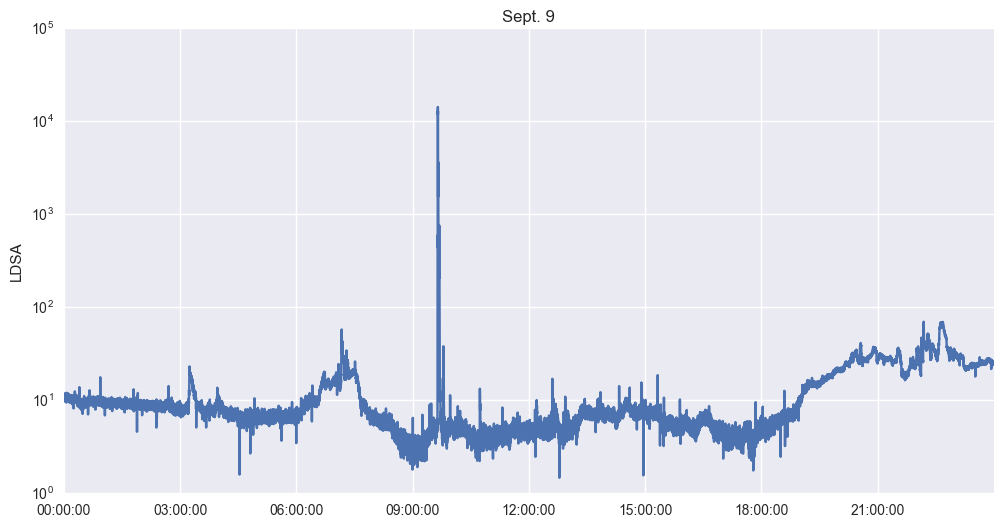

In [220]:
plt.figure(figsize=(12,6))
plt.semilogy(df['datetime'],df['LDSA'])
#plt.ylim([0, 15000])
plt.title('Sept. 9')
plt.ylabel('LDSA')

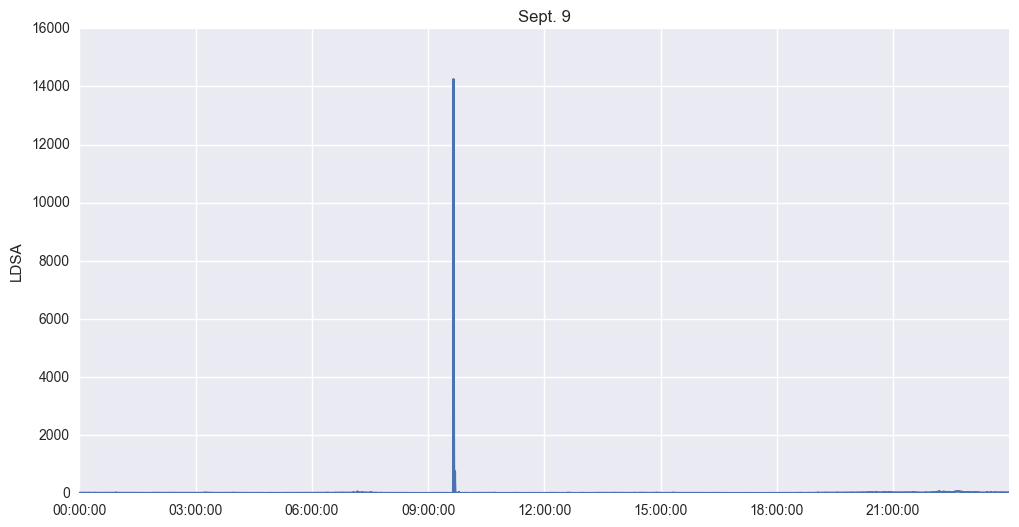

In [203]:
plt.figure(figsize=(12,6))
plt.plot(df['datetime'],df['LDSA'])
plt.title('Sept. 9')
plt.ylabel('LDSA')

In [198]:
df2=data[(data['datetime']>=datetime(2017,10,16)) & (data['datetime']<datetime(2017,10,17))]

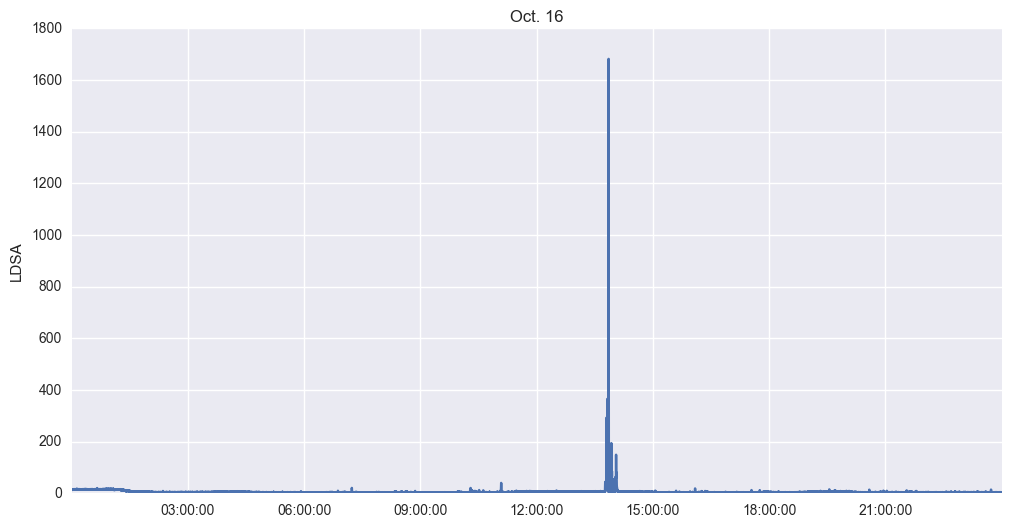

In [205]:
plt.figure(figsize=(12,6))
plt.plot(df2['datetime'],df2['LDSA'])
plt.ylabel('LDSA')
plt.title('Oct. 16')

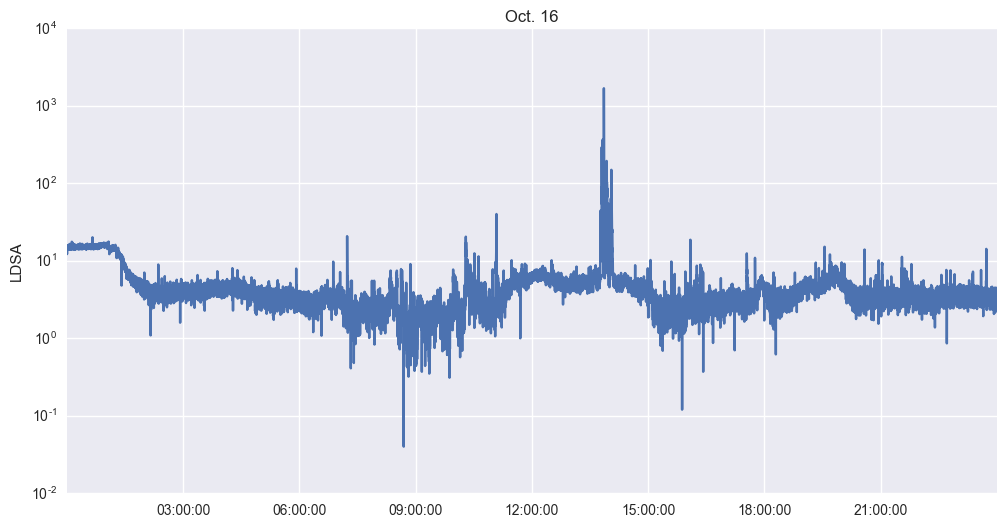

In [206]:
plt.figure(figsize=(12,6))
plt.semilogy(df2['datetime'],df2['LDSA'])
plt.ylabel('LDSA')
plt.title('Oct. 16')

In [113]:
# MINUTE AVERAGES
times=pd.DatetimeIndex(data.datetime)
df_min=data.groupby([times.month, times.day, times.hour, times.minute]).mean().reset_index()
df_min=df_min.rename(columns={'level_0':'month','level_1':'day','level_2':'hour','level_3':'minute'})
df_min['year']=2017
df_min['date']=pd.to_datetime(df_min[['year','month','day','hour','minute']])
del df_min['year'], df_min['month'], df_min['day'], df_min['hour'], df_min['minute']

In [115]:
# HOUR AVERAGES
times=pd.DatetimeIndex(data.datetime)
df_hr=data.groupby([times.month, times.day, times.hour]).mean().reset_index()
df_hr=df_hr.rename(columns={'level_0':'month','level_1':'day','level_2':'hour'})
df_hr['year']=2017
df_hr['date']=pd.to_datetime(df_hr[['year','month','day','hour']])
del df_hr['year'], df_hr['month'], df_hr['day'], df_hr['hour']

In [231]:
data.head()

,time,LDSA,datetime
0,1.0,8.23,2017-08-28 10:28:21
1,2.0,9.11,2017-08-28 10:28:22
2,3.0,8.72,2017-08-28 10:28:23
3,4.0,9.05,2017-08-28 10:28:24
4,5.0,10.18,2017-08-28 10:28:25


In [234]:
del data['time']

In [309]:
indoor.head()

,time,value (µm²/cm³)
0,2017-08-28 00:00:00,34.273514
1,2017-08-28 00:01:00,34.432041
2,2017-08-28 00:02:00,34.333946
3,2017-08-28 00:03:00,34.358799
4,2017-08-28 00:04:00,34.446171


In [358]:
indoor=pd.read_excel('/Users/stella/Desktop/indoor-135-aug-oct.xlsx')
indoor['time2']=indoor['time']-timedelta(hours=1)                      # TIME ADJUSTED -1 HR
del indoor['time']

In [394]:
#test=indoor.set_index('time').join(data.set_index('datetime')).reset_index().dropna()
test=indoor.set_index('time2').join(data2.set_index('datetime')).reset_index().dropna()

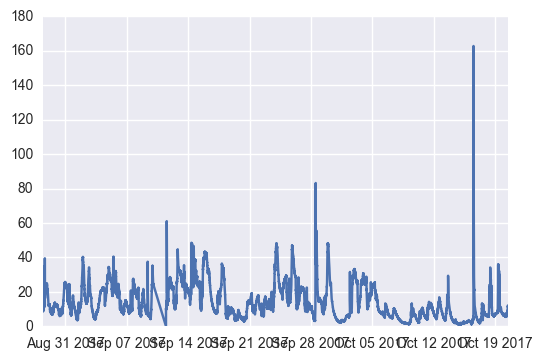

In [395]:
plt.plot(test['index'],test['value (µm²/cm³)'])
#plt.plot(test['index'],test['LDSA'])

(0, 1000)

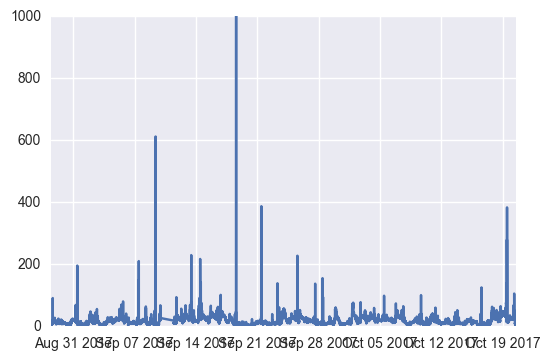

In [396]:
plt.plot(test['index'],test['LDSA'])
plt.ylim(0,1000)

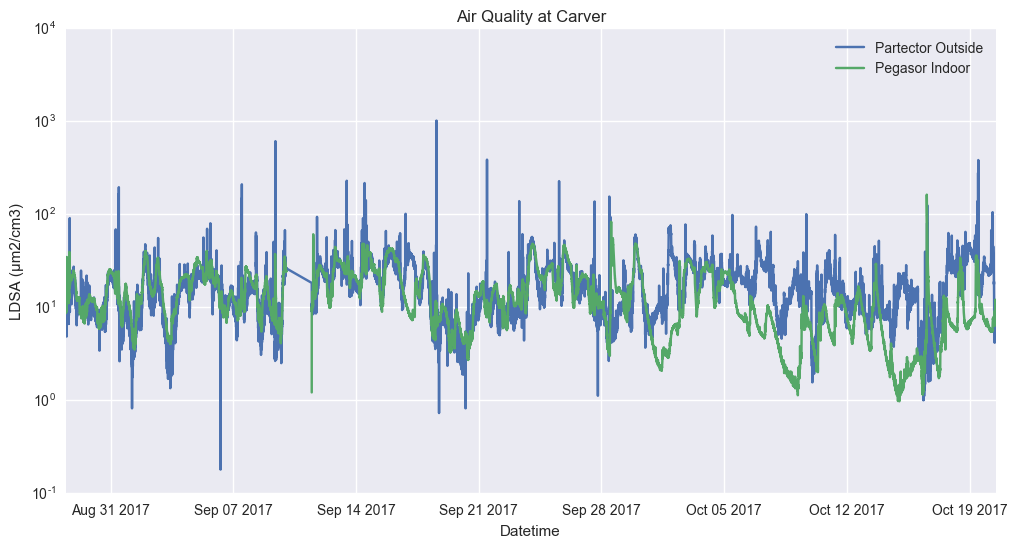

In [397]:
plt.figure(figsize=(12,6))
plt.semilogy(test['index'],test['LDSA'],label='Partector Outside')
plt.semilogy(test['index'],test['value (µm²/cm³)'],label='Pegasor Indoor')
plt.title('Air Quality at Carver')
plt.xlabel('Datetime')
plt.ylabel('LDSA (µm2/cm3)')
plt.legend()

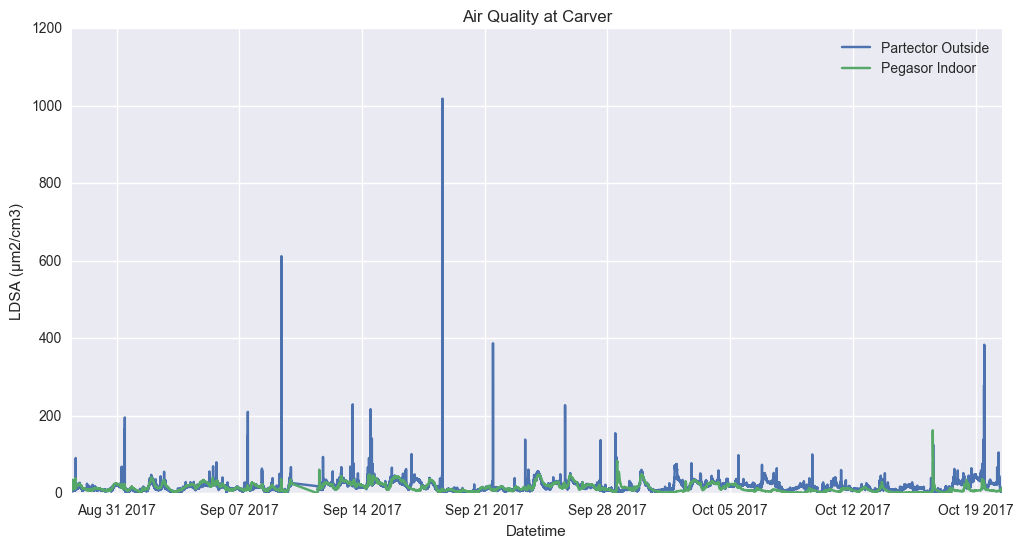

In [402]:
plt.figure(figsize=(12,6))
plt.plot(test['index'],test['LDSA'],label='Partector Outside')
plt.plot(test['index'],test['value (µm²/cm³)'],label='Pegasor Indoor')
plt.title('Air Quality at Carver')
plt.xlabel('Datetime')
plt.ylabel('LDSA (µm2/cm3)')
plt.legend()

In [393]:
data2=data[data['LDSA']<2000]

(0, 200)

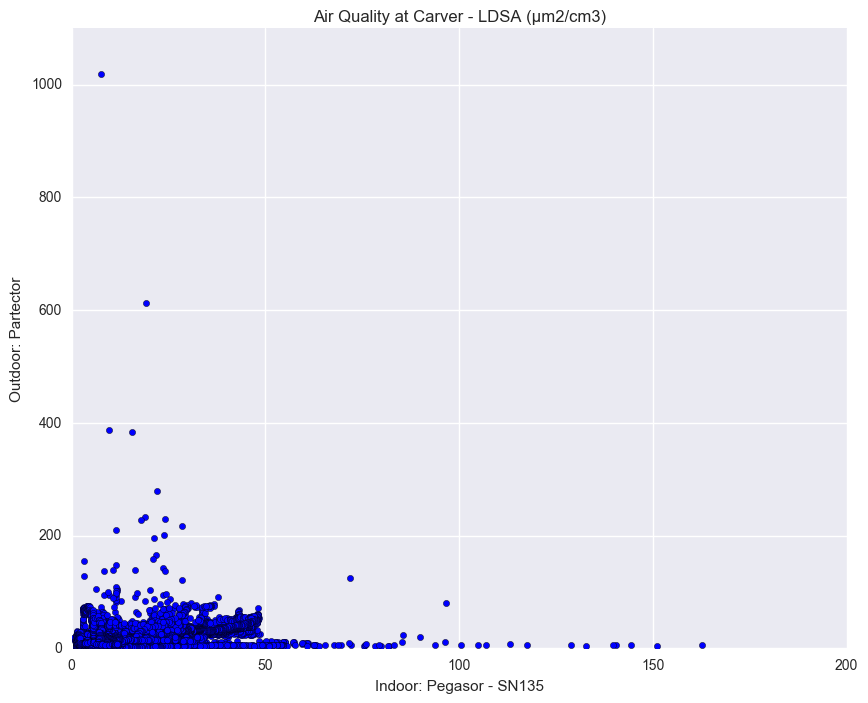

In [408]:
plt.figure(figsize=(10,8))
plt.xlabel('Indoor: Pegasor - SN135')
plt.ylabel('Outdoor: Partector')
plt.title('Air Quality at Carver - LDSA (µm2/cm3)')
plt.scatter(test['value (µm²/cm³)'],test['LDSA'])
plt.ylim(0, 1100)
plt.xlim(0, 200)

In [406]:
data3=test[test['index']<datetime(2017,10,1)]

(0, 200)

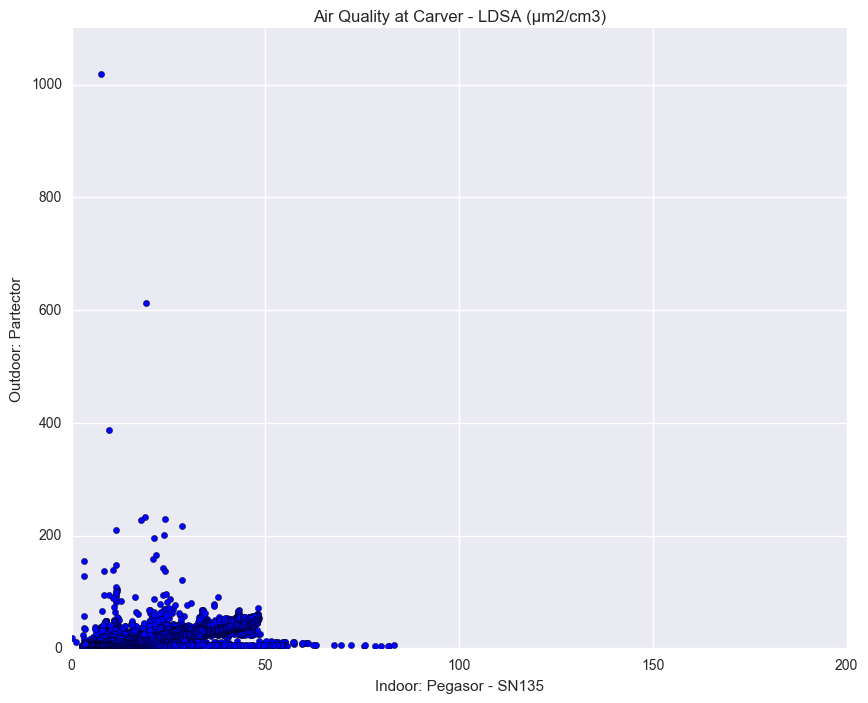

In [409]:
plt.figure(figsize=(10,8))
plt.xlabel('Indoor: Pegasor - SN135')
plt.ylabel('Outdoor: Partector')
plt.title('Air Quality at Carver - LDSA (µm2/cm3)')
plt.scatter(data3['value (µm²/cm³)'],data3['LDSA'])
plt.ylim(0, 1100)
plt.xlim(0, 200)